In [1]:
import cv2
import matplotlib.pyplot as plt

from os import listdir, path, makedirs
from os.path import isfile, join

import shutil
import seaborn
import numpy as np

In [2]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [3]:
lista_arq_faces[0]

's01_01.jpg'

In [4]:
len(lista_arq_faces)

750

In [5]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"
if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)
if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

In [6]:
for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
         shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [7]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation =  cv2.INTER_LANCZOS4)
    return imagem

In [8]:

list_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
list_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [27]:
list_faces_teste[0]

's01_11.jpg'

In [10]:
list_faces_treino[0]

's01_01.jpg'

In [11]:
dados_treinamento, sujeitos = [], []

In [12]:
for i, arq in enumerate(list_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [13]:
dados_teste, sujeitos_teste = [], []

In [14]:
for i, arq in enumerate(list_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [15]:
len(dados_treinamento)

500

In [16]:
len(dados_teste)

250

In [17]:
len(sujeitos_teste)

250

Text(0.5, 1.0, '5')

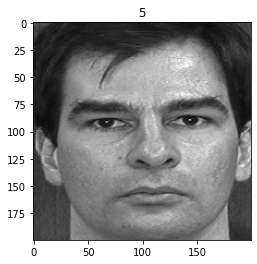

In [18]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

In [19]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [20]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()
modelo_eingenfaces.train(dados_treinamento, sujeitos)

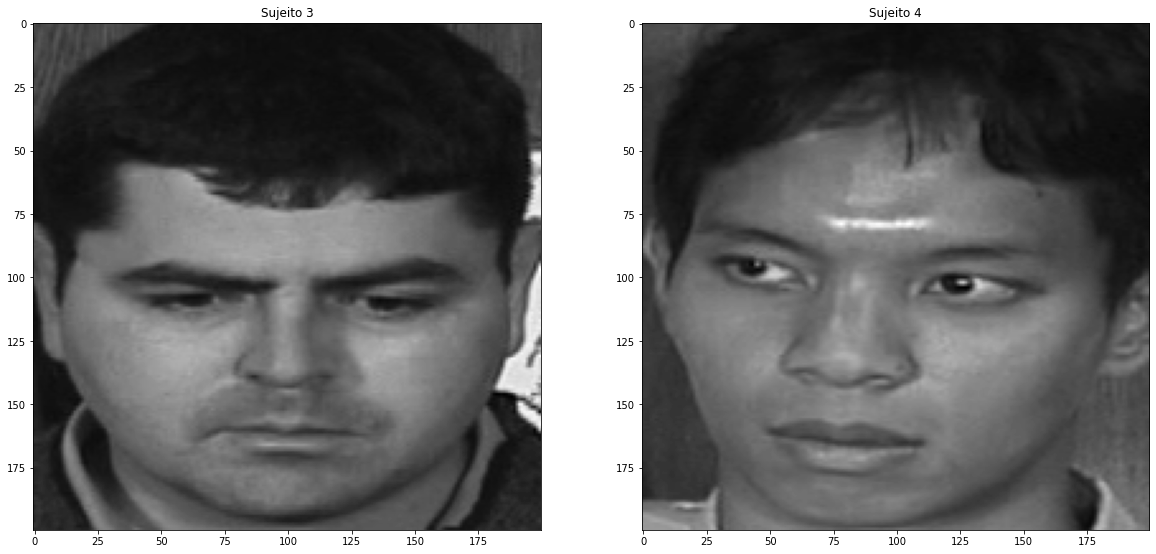

In [45]:

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[19]))
plt.imshow(dados_teste[19], cmap="gray")

plt.show()


In [46]:
predicao = modelo_eingenfaces.predict(dados_teste[13])
predicao

(3, 3315.6174279169195)

In [47]:
predicao = modelo_eingenfaces.predict(dados_teste[19])
predicao

(4, 3120.3973014494786)

In [31]:

modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

modelo_fisherfaces.train(dados_treinamento, sujeitos)

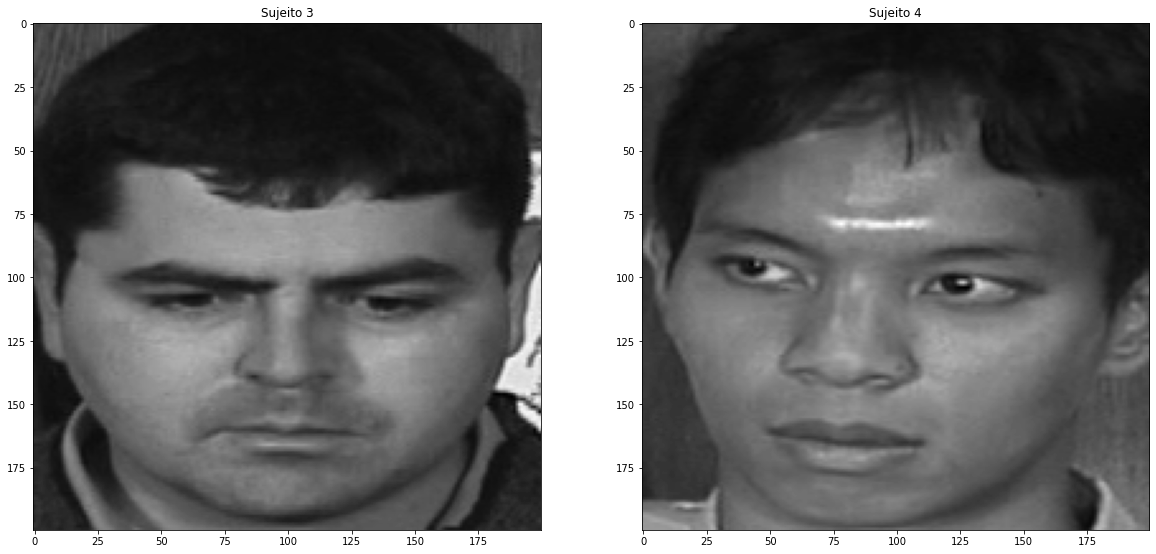

In [32]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[19]))
plt.imshow(dados_teste[19], cmap="gray")

plt.show()

In [38]:
predicao = modelo_fisherfaces.predict(dados_teste[13])
predicao

(3, 891.027050275648)

In [39]:
predicao = modelo_fisherfaces.predict(dados_teste[19])
predicao

(4, 795.3607262696399)

In [40]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()
modelo_lbph.train(dados_treinamento, sujeitos)

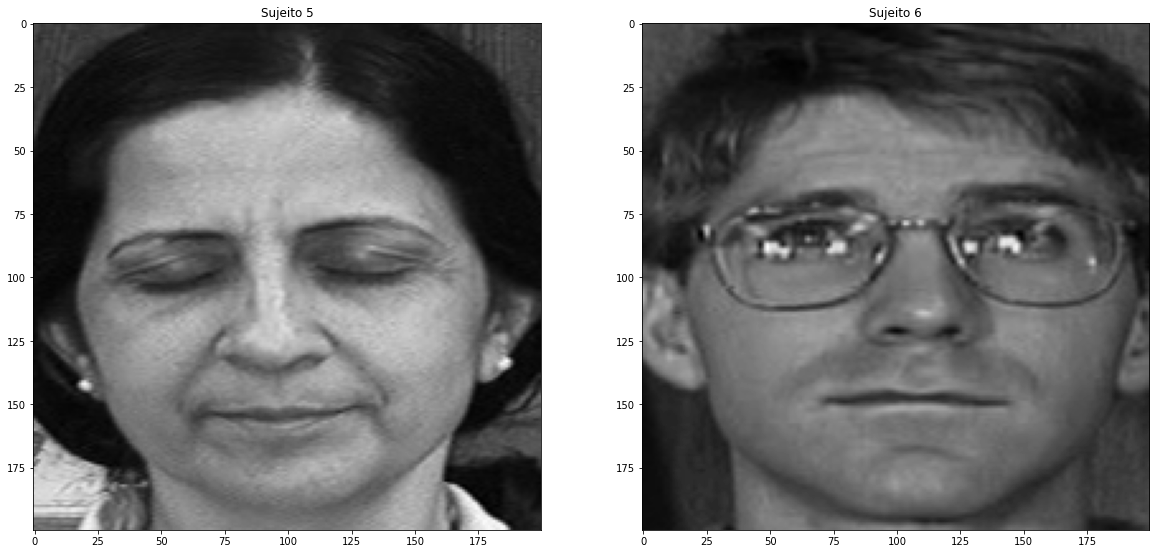

In [41]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[21]))
plt.imshow(dados_teste[21], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap="gray")

plt.show()

In [42]:
predicao = modelo_lbph.predict(dados_teste[21])
predicao

(5, 32.938584374874814)

In [43]:
predicao = modelo_lbph.predict(dados_teste[27])
predicao

(6, 36.49919959564635)